# Medical Cost Analysis


## Importing Required Libraries
We’ll start with importing the required libraries.

In [4]:
# Import Pandas, NumPy, Seaborn, Matplotlib libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import Label Encoder and train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Import Linear Regression, Ridge Regressor, Decision Tree
# and Random Forest models
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# Import Classification Report function
from sklearn.metrics import classification_report

from sklearn import metrics

##Perform An Exploratory Data Analysis

### Read the data

In [5]:
insurance = pd.read_csv('/content/sample_data/insurance.csv')
data = insurance.copy()
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


###Preprocessing The Data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# Check min, max and mean of values
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [8]:
# Convert objects to categorical variables
object_columns = data.select_dtypes("object").columns
for col in object_columns:
    data[col] = data[col].astype('category')

# Check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


### Examine the distribution of Bmi (Body Mass Index)

In [9]:
data['bmi'].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

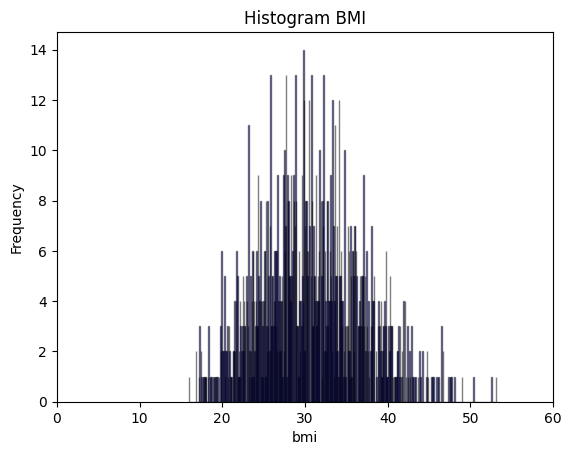

In [10]:
# Build Histogram to visualise bmi distribution
num_bins = 548
n, bins, patches = plt.hist(data.bmi, num_bins, color='b', alpha=0.5, histtype = 'bar', ec = 'black')
plt.ylabel ('Frequency')
plt.xlabel ('bmi')
plt.xlim([0, 60])

plt.title ('Histogram BMI')
plt.show()

In [11]:
# Mean of the bmi values
data['bmi'].mean()

30.66339686098655

### Examine the relationship between “smoker” and “charges”


<ipython-input-12-f9dc7e434500>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='smoker', y='charges', data=data, ci=None)


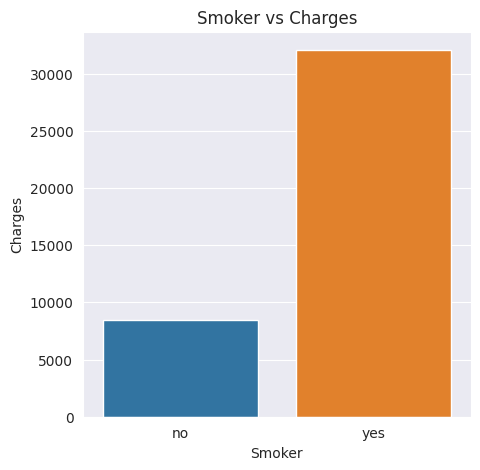

In [12]:
# Plot of smoker vs charges
sns.set_style('darkgrid')
plt.figure(figsize=(5, 5))

sns.barplot(x='smoker', y='charges', data=data, ci=None)

plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Smoker vs Charges')

plt.show()

### Examine the relationship between “smoker” and “region”

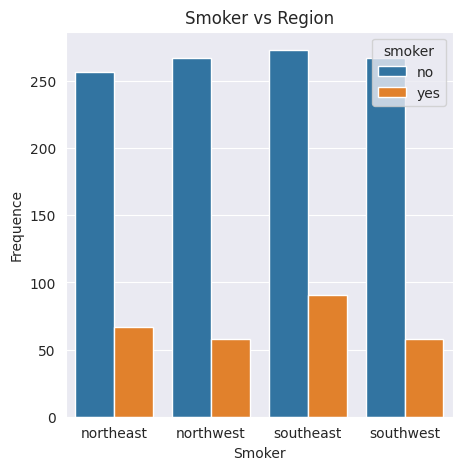

In [13]:
# Plot of smoker vs region
sns.set_style('darkgrid')
plt.figure(figsize=(5, 5))

#sns.scatterplot(x='smoker', y='region', data=data, edgecolor='b')
sns.countplot(x='region', hue='smoker', data=data)
plt.xlabel('Smoker')
plt.ylabel('Frequence')
plt.title('Smoker vs Region')

plt.show()

### Examine the relationship between “bmi” and “sex”

<ipython-input-14-6ae0763ee912>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='bmi', y='sex', data=data, ci=None)


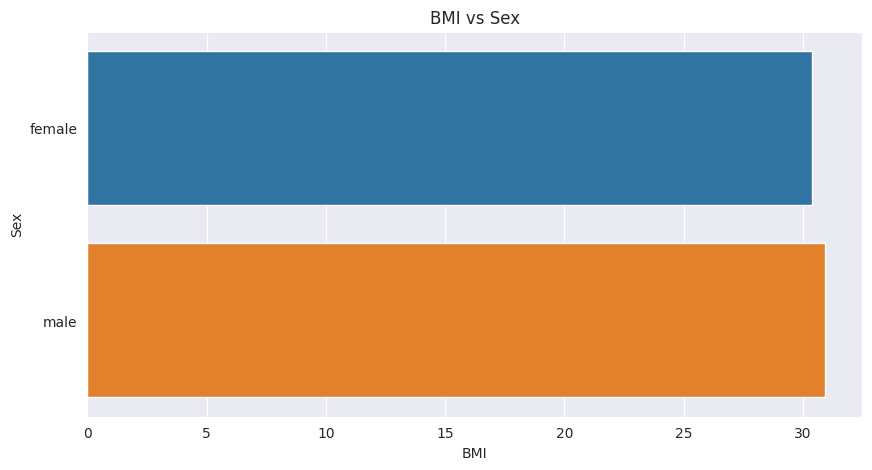

In [14]:
# Plot of bmi vs sex
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))

sns.barplot(x='bmi', y='sex', data=data, ci=None)

plt.xlabel('BMI')
plt.ylabel('Sex')
plt.title('BMI vs Sex')

plt.show()

### Find the "region" with the most "children".

### Examine the relationship between “age” and “bmi”.

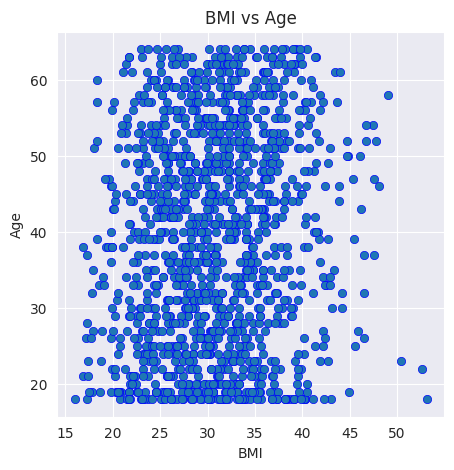

In [15]:
# Plot of bmi vs age
sns.set_style('darkgrid')
plt.figure(figsize=(5, 5))

sns.scatterplot(x='bmi', y='age', data=data, edgecolor='b')

plt.xlabel('BMI')
plt.ylabel('Age')
plt.title('BMI vs Age')

plt.show()

### Examine the relationship between “bmi” and “children”.

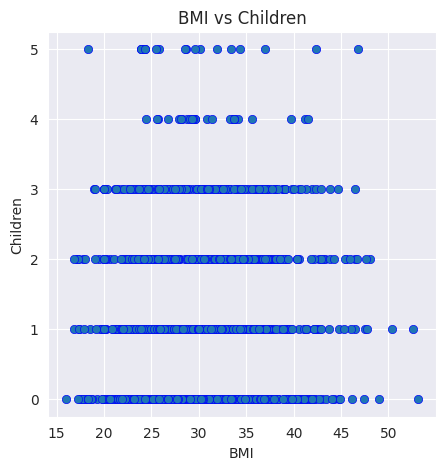

In [16]:
# Plot of bmi vs children
sns.set_style('darkgrid')
plt.figure(figsize=(5, 5))

sns.scatterplot(x='bmi', y='children', data=data, edgecolor='b')

plt.xlabel('BMI')
plt.ylabel('Children')
plt.title('BMI vs Children')

plt.show()

### Analysing Outliers For BMI


<Axes: xlabel='bmi'>

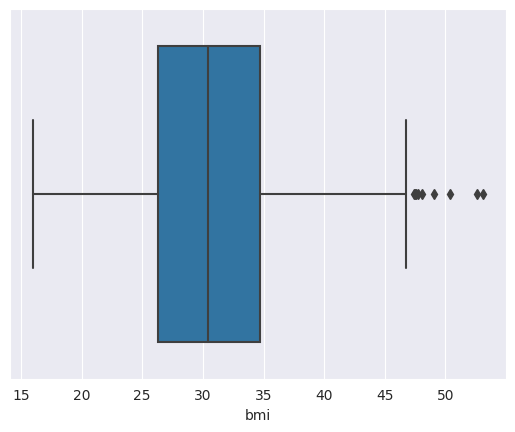

In [17]:
sns.boxplot(x='bmi', data=data)

### Examine the relationship between “bmi” and “charges”.


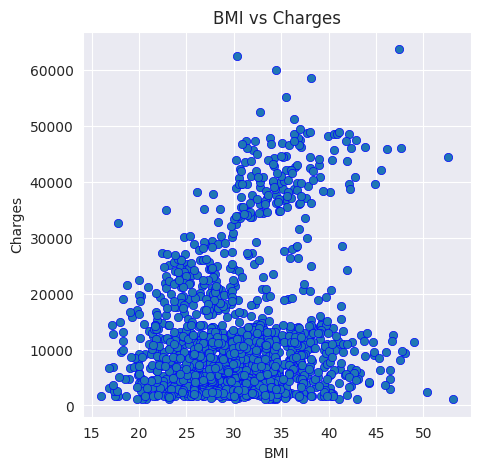

In [18]:
# Plot of bmi vs children
sns.set_style('darkgrid')
plt.figure(figsize=(5, 5))

sns.scatterplot(x='bmi', y='charges', data=data, edgecolor='b')

plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs Charges')

plt.show()

### Examine the relationship between “region”, “smoker” and “bmi” using bar plot.

<ipython-input-19-628a774116a3>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='region', y='bmi', hue='smoker', data=data, ci=None)


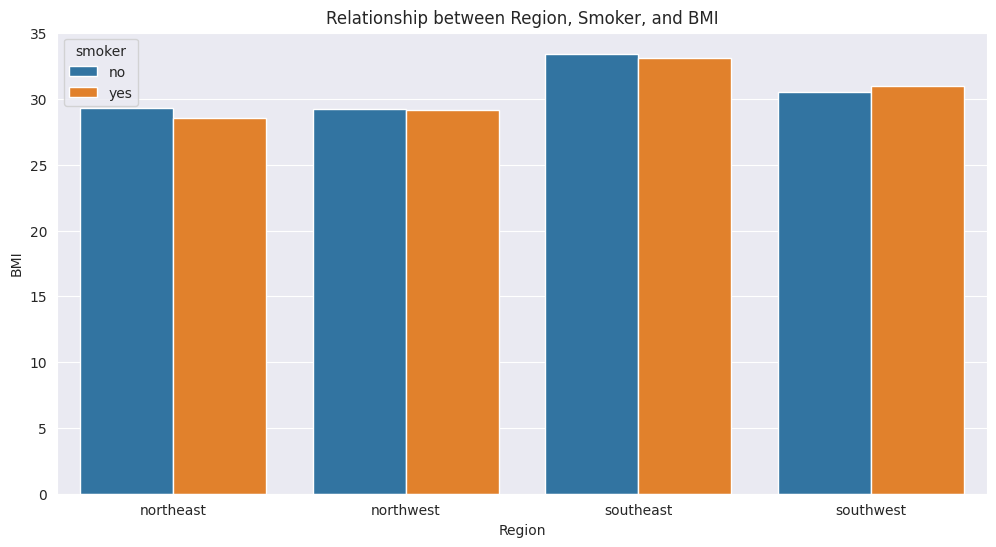

In [19]:
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))

sns.barplot(x='region', y='bmi', hue='smoker', data=data, ci=None)

# Set labels and title
plt.xlabel('Region')
plt.ylabel('BMI')
plt.title('Relationship between Region, Smoker, and BMI')

# Show the plot
plt.show()

## Data Preprocessing

### One Hot *Encoding*

In [20]:
# Target variable y and feature X
y = data['charges']
X = data.drop(['charges'], axis = 1)
X_encoded = pd.get_dummies(X, columns=['sex', 'smoker', 'region'], drop_first=True)
X = X_encoded

### Label Encoding

In [21]:
# Create an LabelEncoder object
encoder = LabelEncoder()

# Encode the features to integers inside a for loop
for i in X.columns:
  X[i] = encoder.fit_transform(X[i])

# Encode the ouput labels to integers
y = encoder.fit_transform(y)

In [22]:
X

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,1,197,0,0,1,0,0,1
1,0,350,1,1,0,0,1,0
2,10,331,3,1,0,0,1,0
3,15,73,0,1,0,1,0,0
4,14,223,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,32,276,3,1,0,1,0,0
1334,0,302,0,0,0,0,0,0
1335,0,422,0,0,0,0,1,0
1336,3,146,0,0,0,0,0,1


In [23]:
y

array([1005,   57,  306, ...,   32,   91, 1171])

### Split the data

In [24]:
# Split the dataset into train and test sets with 70-30 ratio
X_train, X_test, y_train, y_test =train_test_split(X , y, test_size=0.3, random_state=123)

## Model Selection

In [25]:
# Create an object using the LogisticRegression()
linear_model = LinearRegression()

# Create an object using the RidgeClassifier()
ridge_model = Ridge()

# Create an object using the KNeighborsRegressor()
kneighbors_model = KNeighborsRegressor()

# Create Random Forest  object
random_forest_model = RandomForestRegressor()

# Create an object using the DecisionTreeRegressor()
decision_trees_model = DecisionTreeRegressor()



In [26]:
# Train the Logistic Classifier model
linear_model.fit(X_train , y_train)

# Train the Ridge Classifier model
ridge_model.fit(X_train , y_train)

# Train the KNeighborsRegressor model
kneighbors_model.fit(X_train , y_train)

# Train the Random Forest model
random_forest_model.fit(X_train , y_train)

# Train the Decision Tree model
decision_trees_model.fit(X_train , y_train)


DecisionTreeRegressor()

In [27]:
print('*****Linear Regression*****')
print("Accuracy of train:", linear_model.score(X_train, y_train))
print("Accuracy of test:", linear_model.score(X_test, y_test))

print('*****Ridge Regression*****')
print("Accuracy of train:", ridge_model.score(X_train, y_train))
print("Accuracy of test:", ridge_model.score(X_test, y_test))

print('*****KNeighbors Regression*****')
print("Accuracy of train:", kneighbors_model.score(X_train, y_train))
print("Accuracy of test:", kneighbors_model.score(X_test, y_test))

print('*****Random Forest*****')
print("Accuracy of train:", random_forest_model.score(X_train, y_train))
print("Accuracy of test:", random_forest_model.score(X_test, y_test))

print('*****Decision Tree*****')
print("Accuracy of train:", decision_trees_model.score(X_train, y_train))
print("Accuracy of test:", decision_trees_model.score(X_test, y_test))

*****Linear Regression*****
Accuracy of train: 0.7514375456522719
Accuracy of test: 0.7858456980145506
*****Ridge Regression*****
Accuracy of train: 0.751416790296279
Accuracy of test: 0.78554728688916
*****KNeighbors Regression*****
Accuracy of train: 0.42247384168916424
Accuracy of test: 0.13968812941165942
*****Random Forest*****
Accuracy of train: 0.9652396042617343
Accuracy of test: 0.7996392034583448
*****Decision Tree*****
Accuracy of train: 0.9970493573502992
Accuracy of test: 0.5229164146594376


### Making Predictions

<ipython-input-28-a57e8ae4c0f1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  axes = sns.distplot((y_test - linear_pred))
<ipython-input-28-a57e8ae4c0f1>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  subplot(2,2,1)
<ipython-input-28-a57e8ae4c0f1>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your 

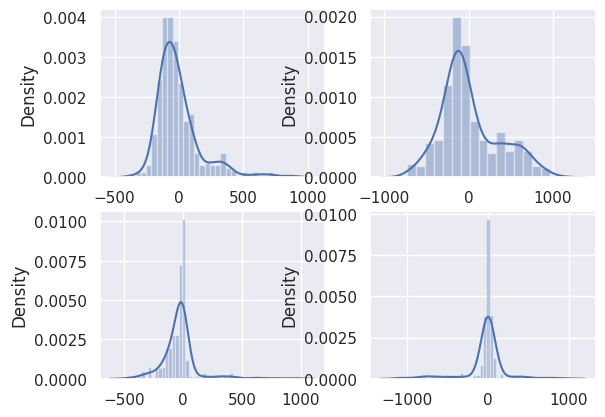

In [28]:
from pylab import *
linear_pred = linear_model.predict(X_test)

fig, axes = plt.subplots()
axes = sns.distplot((y_test - linear_pred))

sns.set(rc={"figure.figsize": (20, 10)}); np.random.seed(0)
x = np.random.randn(100)

ridge_pred = ridge_model.predict(X_test)
subplot(2,2,1)
axes=sns.distplot((y_test - ridge_pred))

kneighbor_pred = kneighbors_model.predict(X_test)
subplot(2,2,2)
axes=sns.distplot((y_test - kneighbor_pred))

randomforest_pred = random_forest_model.predict(X_test)
subplot(2,2,3)
axes=sns.distplot((y_test - randomforest_pred))

dectree_pred = decision_trees_model.predict(X_test)
subplot(2,2,4)
axes=sns.distplot((y_test - dectree_pred))


## Hyper-parameter Optimization
Choose RandomForestRegressor to optimize

In [29]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


For Grid Search:

In [39]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)####??????


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

## Model Evaluation

In [32]:
models ={
    'LinearRegression': {
        'model': LinearRegression()
    },
    'Ridge': {
        'model':Ridge()
    },
    'KNeighborsRegressor': {
        'model': KNeighborsRegressor()
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor()
    },

    'DecisionTreeRegressor': {
        'model': DecisionTreeRegressor(max_depth = 9, min_samples_split = 4, random_state = 1)
    },
}

In [33]:

# Add dictionary attributes
for model in models:
    models[model]['prediction'] = None
    models[model]['errors'] = {
        'mae': None,
        'mse': None,
        'rmse': None
    }
    models[model]['scores'] = {
        'r2': None
    }

In [34]:
for model in models:
    print('Running ', models[model]['model'])
    models[model]['model'].fit(X_train, y_train)
    models[model]['predictions'] = models[model]['model'].predict(X_test)
    models[model]['errors']['mae'] = metrics.mean_absolute_error(y_test, models[model]['predictions'])
    models[model]['errors']['mse'] = metrics.mean_squared_error(y_test, models[model]['predictions'])
    models[model]['errors']['rmse'] = np.sqrt(models[model]['errors']['mse'])
    models[model]['scores']['r2'] = metrics.r2_score(y_test, models[model]['predictions'])
    print('MAE: ', models[model]['errors']['mae'])
    print('MSE: ', models[model]['errors']['mse'])
    print('RMSE: ', models[model]['errors']['rmse'])
    print('R2: ', models[model]['scores']['r2'])
    print('\n')

Running  LinearRegression()
MAE:  121.24209684382194
MSE:  30189.561800616353
RMSE:  173.7514368303651
R2:  0.7858456980145506


Running  Ridge()
MAE:  121.48835176248782
MSE:  30231.629137244418
RMSE:  173.87245077137555
R2:  0.78554728688916


Running  KNeighborsRegressor()
MAE:  271.24477611940296
MSE:  121279.08776119401
RMSE:  348.2514720158323
R2:  0.13968812941165942


Running  RandomForestRegressor()
MAE:  92.62834577114428
MSE:  27612.277802798508
RMSE:  166.1694249938854
R2:  0.8041280586270084


Running  DecisionTreeRegressor(max_depth=9, min_samples_split=4, random_state=1)
MAE:  105.62850197912981
MSE:  41223.73539621173
RMSE:  203.03629083543595
R2:  0.7075730897548719




Based on these metrics, the RandomForest Regression model appears to have the best performance among the modelsevaluated. It has the lowest MAE, MSE, and RMSE, indicating smaller prediction errors, and the highest R2 score, indicating a better fit to the data.